<a href="https://colab.research.google.com/github/hosseinrezaie0/Heart-Failure-Prediction/blob/main/main(feature_selection_filter_methods).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss

import warnings as wr
wr.filterwarnings('ignore')

## Preprocessing

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Drop data with cholesterol = 0
df = df[df['Cholesterol'] != 0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


In [6]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,28,M,ATA,130,132,0,LVH,185,N,0.0,Up,0
1,55,F,ATA,122,320,0,Normal,155,N,0.0,Up,0
2,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
3,50,M,ATA,120,168,0,Normal,160,N,0.0,Up,0
4,71,M,ASY,130,221,0,ST,115,Y,0.0,Flat,1


In [7]:
# Convert Categorical columns into numerical columns
encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  df[col] = encoder.fit_transform(df[col])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,28,1,1,130,132,0,0,185,0,0.0,2,0
1,55,0,1,122,320,0,1,155,0,0.0,2,0
2,39,1,2,160,147,1,1,160,0,0.0,2,0
3,50,1,1,120,168,0,1,160,0,0.0,2,0
4,71,1,0,130,221,0,2,115,1,0.0,1,1


In [8]:
# Normalize non_categorical columns
scaler = MinMaxScaler()
non_categorical_columns = df.columns.difference(categorical_columns)
df[non_categorical_columns] = scaler.fit_transform(df[non_categorical_columns])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.000000,1,1,0.351852,0.090734,0.0,0,0.872180,0,0.015873,2,0.0
1,0.551020,0,1,0.277778,0.453668,0.0,1,0.646617,0,0.015873,2,0.0
2,0.224490,1,2,0.629630,0.119691,1.0,1,0.684211,0,0.015873,2,0.0
3,0.448980,1,1,0.259259,0.160232,0.0,1,0.684211,0,0.015873,2,0.0
4,0.877551,1,0,0.351852,0.262548,0.0,2,0.345865,1,0.015873,1,1.0


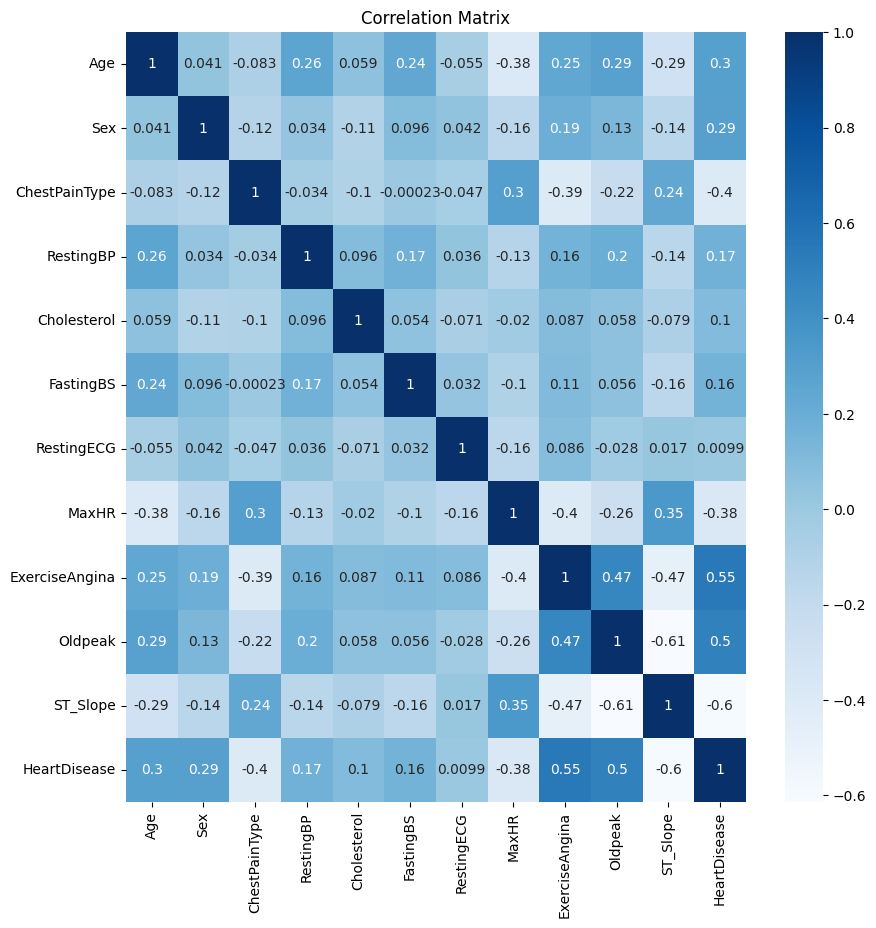

In [9]:
# Plot Correlation Matrix

fig, axes = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', ax=axes)
axes.set_title('Correlation Matrix')
plt.show()

In [10]:
# Drop RestECG column - based on correlation
df = df.drop('RestingECG', axis=1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.000000,1,1,0.351852,0.090734,0.0,0.872180,0,0.015873,2,0.0
1,0.551020,0,1,0.277778,0.453668,0.0,0.646617,0,0.015873,2,0.0
2,0.224490,1,2,0.629630,0.119691,1.0,0.684211,0,0.015873,2,0.0
3,0.448980,1,1,0.259259,0.160232,0.0,0.684211,0,0.015873,2,0.0
4,0.877551,1,0,0.351852,0.262548,0.0,0.345865,1,0.015873,1,1.0


In [11]:
df.columns.size

11

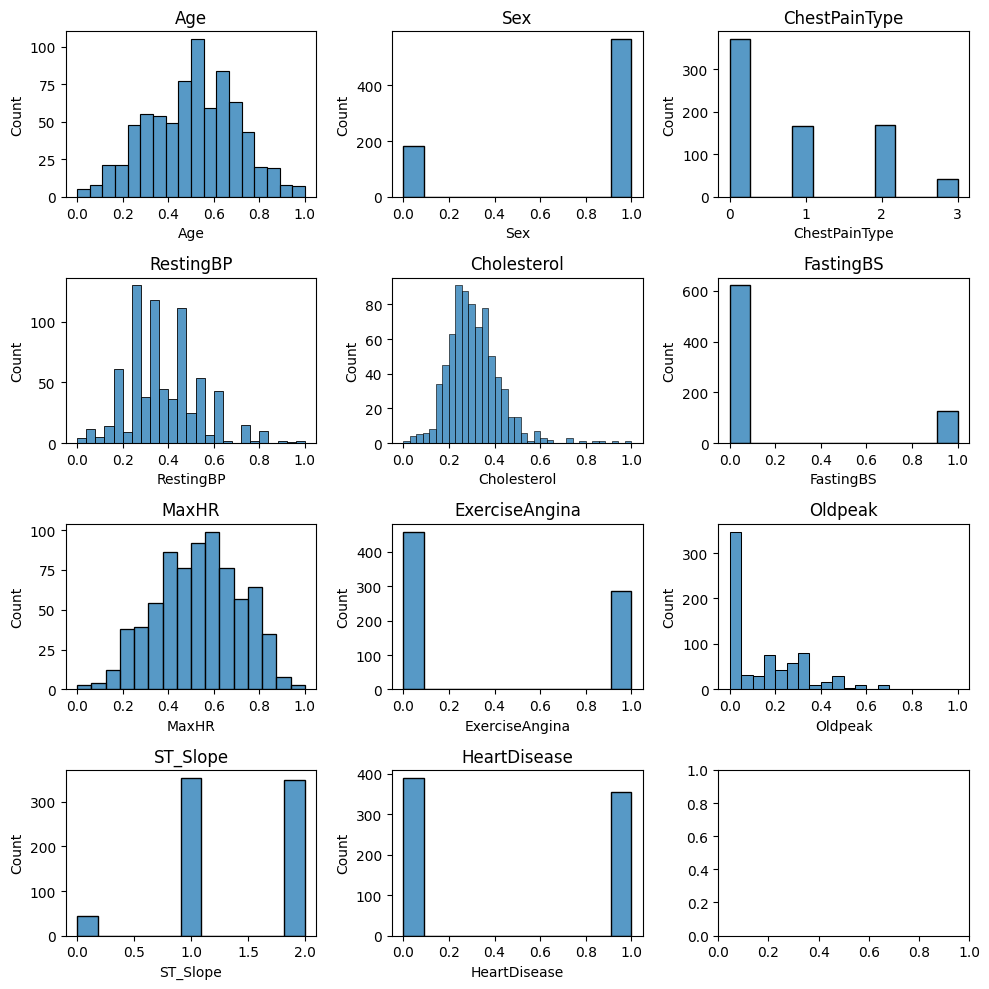

In [12]:
# Plot the distribution of columns
fig, axes = plt.subplots(4, 3, figsize=(10,10))
axes = axes.flatten()
for i, col in enumerate(df.columns):
  if i == 12:
    break
  sns.histplot(df[col], ax=axes[i])
  axes[i].set_title(col)
plt.tight_layout()

In [16]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Get test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)
print('-------------------------------')
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

X_train shape: (476, 10)
X_val shape: (120, 10)
X_test shape: (150, 10)
-------------------------------
y_train shape: (476,)
y_val shape: (120,)
y_test shape: (150,)


### Train the models

In [17]:
def get_preds_probs(model, X, y):
  y_pred = model.predict(X)
  y_prob = model.predict_proba(X)

  return accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred), f1_score(y, y_pred), log_loss(y, y_prob)


#### Logistic Regression


In [18]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

acc_train, precision_train, recall_train, f1_train, loss_train = get_preds_probs(lr_model, X_train, y_train)
acc_val, precision_val, recall_val, f1_val, loss_val = get_preds_probs(lr_model, X_val, y_val)
acc_test, precision_test, recall_test, f1_test, loss_test = get_preds_probs(lr_model, X_test, y_test)

lr_results = pd.DataFrame(
    {
        "Set" : ["Train", "Validation", "Test"],
        "Accuracy" : [acc_train, acc_val, acc_test],
        "Precision" : [precision_train, precision_val, precision_test],
        "Recall" : [recall_train, recall_val, recall_test],
        "F1" : [f1_train, f1_val, f1_test],
        "Log Loss" : [loss_train, loss_val, loss_test]
    }
)

print(lr_results.round(4))

          Set  Accuracy  Precision  Recall      F1  Log Loss
0       Train    0.8487     0.8445  0.8517  0.8481    0.3568
1  Validation    0.8500     0.8113  0.8431  0.8269    0.4062
2        Test    0.8667     0.8451  0.8696  0.8571    0.3376


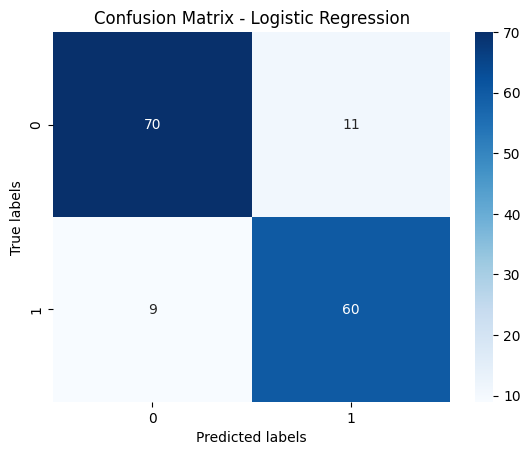

In [20]:
cm = confusion_matrix(y_test, lr_model.predict(X_test))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
plt.show()